#  Проект "Рынок заведений общественного питания Москвы"

# Бриф:

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

# Задачи:

- Исследуйте соотношение видов объектов общественного питания по количеству.
- Исследуйте соотношение сетевых и несетевых заведений по количеству.
- Для какого вида объекта общественного питания характерно сетевое распространение?
- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
- Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? 
- Топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?
- Число улиц с одним объектом общественного питания.В каких районах Москвы находятся эти улицы?
- Выводы и рекомендации.

## Импорт файлов

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [3]:
try:
    df = pd.read_csv('/content/project_8_grafiki.csv')
except:
    df = pd.read_csv('/datasets/rest_data.csv')

## Анализ данных

In [4]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df['object_type'] = df['object_type'].replace(
    'предприятие быстрого обслуживания', 'фаст-фуд')

In [8]:
df['object_type'] = df['object_type'].replace(
    'магазин (отдел кулинарии)', 'кулинария')

In [9]:
df['object_name'] = df['object_name'].str.lower()

In [10]:
df['address'] = df['address'].str.lower()

In [11]:
plt.rcParams["figure.figsize"] = (14, 6)
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [13]:
df.duplicated(subset=('object_name', 'address', 'number')).sum()

93

In [14]:
df = df.drop_duplicates(
    subset=('object_name', 'address', 'number')).reset_index(drop=True)

## Cоотношение видов объектов общественного питания по количеству.

In [15]:
object_type = df.groupby('object_type')['id'].agg(
    ['count']).sort_values(by='count', ascending=False)

In [16]:
object_type['pct'] = object_type['count'] / object_type['count'].sum() * 100

In [17]:
object_type

,count,pct
object_type,,
кафе,6068,39.73
столовая,2584,16.92
ресторан,2281,14.93
фаст-фуд,1897,12.42
бар,854,5.59
буфет,575,3.76
кафетерий,395,2.59
закусочная,346,2.27
кулинария,273,1.79


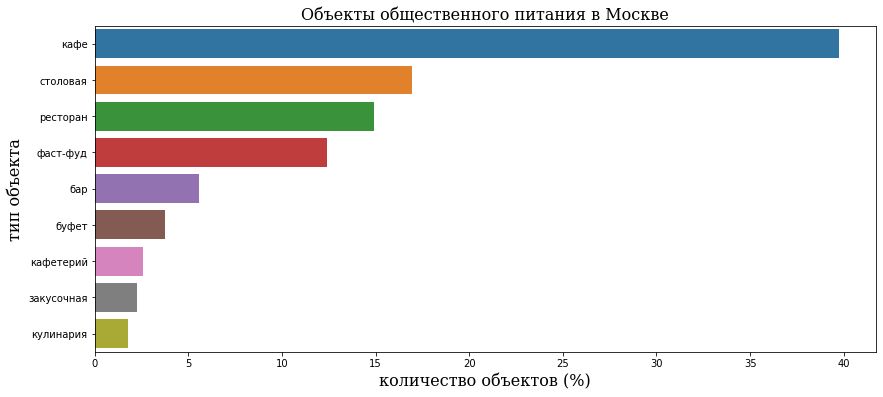

In [18]:
ax = sns.barplot(x='pct', y=object_type.index, data=object_type)
ax.set_title('Объекты общественного питания в Москве', fontdict=font)
ax.set_xlabel('количество объектов (%)', fontdict=font)
ax.set_ylabel('тип объекта', fontdict=font)
plt.show()

### Больше всего заведений типа - "КАФЕ" 40% от общего числа

## Соотношение сетевых и несетевых заведений по количеству.

In [19]:
chain = df.groupby('chain')['id'].agg(
    ['count']).sort_values(by='count', ascending=False)

In [20]:
chain['pct'] = chain['count'] / chain['count'].sum() * 100

In [21]:
chain

,count,pct
chain,,
нет,12310,80.60
да,2963,19.40


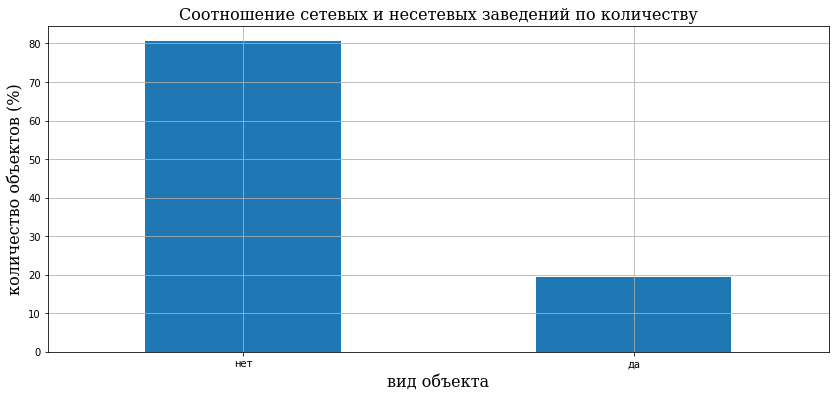

In [22]:
chain['pct'].plot.bar()

plt.title('Соотношение сетевых и несетевых заведений по количеству', fontdict=font)
# plt.legend()
plt.xticks(rotation=0)
plt.xlabel('вид объекта', fontdict=font)
plt.ylabel('количество объектов (%)', fontdict=font)
plt.ylim(0)
plt.grid(True)
plt.show()

### Большиство заведений в Москве - "НЕ СЕТЕВЫЕ", а именно 80%

## Для какого вида объекта общественного питания характерно сетевое распространение?

In [23]:
t = df.query('chain == "да"').groupby(
    'object_type')['id'].count().reset_index()

In [24]:
tt = df.groupby('object_type')['id'].count().reset_index()

In [25]:
object_type_chain = t.merge(tt, how='left', on='object_type')
object_type_chain

,object_type,id_x,id_y
0,бар,37,854
1,буфет,10,575
2,закусочная,56,346
3,кафе,1396,6068
4,кафетерий,52,395
5,кулинария,78,273
6,ресторан,543,2281
7,столовая,3,2584
8,фаст-фуд,788,1897


In [26]:
object_type_chain['pct'] = object_type_chain['id_x'] / \
    object_type_chain['id_y'] * 100

In [27]:
object_type_chain

,object_type,id_x,id_y,pct
0,бар,37,854,4.33
1,буфет,10,575,1.74
2,закусочная,56,346,16.18
3,кафе,1396,6068,23.01
4,кафетерий,52,395,13.16
5,кулинария,78,273,28.57
6,ресторан,543,2281,23.81
7,столовая,3,2584,0.12
8,фаст-фуд,788,1897,41.54


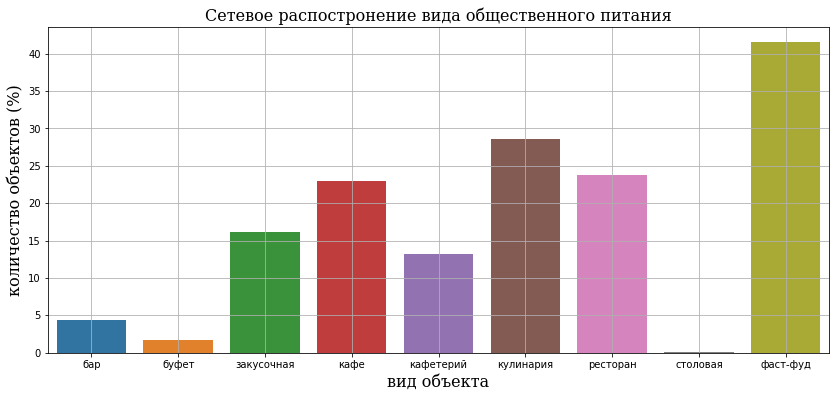

In [28]:
sns.barplot(
    x="object_type",
    y="pct",
    # hue="chain",
    ci=None,
    capsize=0.1,
    data=object_type_chain
)

plt.title('Сетевое распостронение вида общественного питания', fontdict=font)
# plt.legend()
plt.xticks(rotation=0)
plt.xlabel('вид объекта', fontdict=font)
plt.ylabel('количество объектов (%)', fontdict=font)
plt.ylim(0)
plt.grid(True)
plt.show()

### Сетевое распостранение характерно для "ФАСТ-ФУДА"

## Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [29]:
# фильтр по сетевой/не_сетевой
df.query('chain == "да"').groupby('object_type')['number'].agg(
    ['count', 'sum', 'mean', 'median', 'min', 'max'])

,count,sum,mean,median,min,max
object_type,,,,,,
бар,37,1962,53.03,45.00,0,150
буфет,10,140,14.00,0.00,0,70
закусочная,56,805,14.38,8.00,0,91
кафе,1396,66208,47.43,40.00,0,456
кафетерий,52,638,12.27,8.00,0,85
кулинария,78,677,8.68,3.50,0,48
ресторан,543,54497,100.36,89.00,0,500
столовая,3,337,112.33,120.00,55,162
фаст-фуд,788,31772,40.32,25.00,0,580


In [30]:
# уберем 1%
np.percentile(df.query('chain == "да"')['number'], [0, 1, 95, 99])

array([  0.  ,   0.  , 158.9 , 275.38])

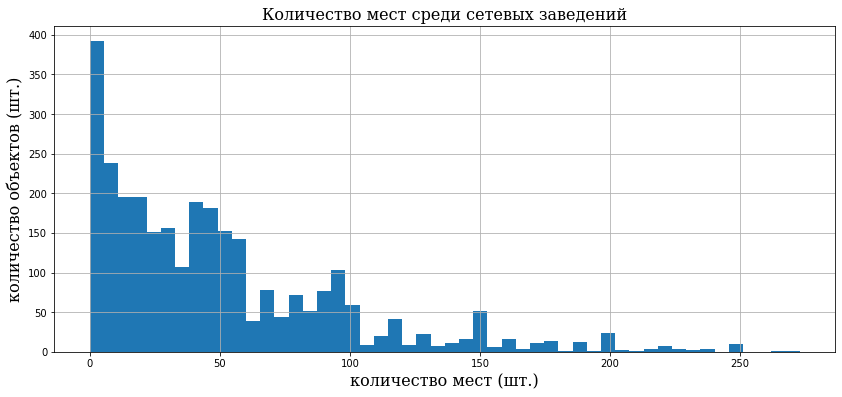

In [31]:
df.query('chain == "да" & number < 275')['number'].hist(bins=50)

plt.title('Количество мест среди сетевых заведений', fontdict=font)
# plt.legend()
plt.xticks(rotation=0)
plt.xlabel('количество мест (шт.)', fontdict=font)
plt.ylabel('количество объектов (шт.)', fontdict=font)
plt.ylim(0)
plt.grid(True)
plt.show()

In [32]:
x_values = pd.Series(
    range(0, len(df.query('chain == "да" & number < 275')['number'])))

In [33]:
y_values = df.query('chain == "да" & number < 275')['number']

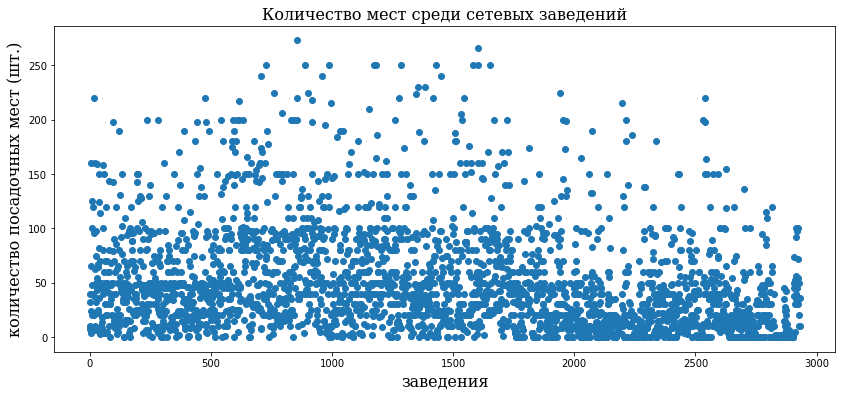

In [34]:
plt.scatter(x_values, y_values)

plt.title('Количество мест среди сетевых заведений', fontdict=font)
plt.xlabel('заведения', fontdict=font)
plt.ylabel('количество посадочных мест (шт.)', fontdict=font)
plt.show()

In [35]:
t = (df.query('chain == "да"')
     .groupby('object_name')['number']
     .agg(['count', 'mean'])
     .reset_index()
     )

In [36]:
t['count_sort'] = pd.cut(t['count'], 2, labels=[
                         'мало зав./', 'много зав./']).astype(str)

In [37]:
t['number_sort'] = pd.qcut(t['mean'], 2, labels=[
                           'мало мест', 'много мест']).astype(str)

In [38]:
t

,object_name,count,mean,count_sort,number_sort
0,beverly hills diner,1,88.00,мало зав./,много мест
1,bierloga,1,75.00,мало зав./,много мест
2,black & white,1,40.00,мало зав./,мало мест
3,bocconcino,3,66.67,мало зав./,много мест
4,boobo,1,46.00,мало зав./,много мест
...,...,...,...,...,...
572,ямми микс,1,2.00,мало зав./,мало мест
573,ян примус,1,300.00,мало зав./,много мест
574,японский ресторан «ваби-саби»,1,155.00,мало зав./,много мест
575,япоша,2,105.00,мало зав./,много мест


In [39]:
t['category'] = t['count_sort'] + t['number_sort']

In [40]:
t = t[['object_name', 'count', 'mean', 'category']]

In [41]:
t

,object_name,count,mean,category
0,beverly hills diner,1,88.00,мало зав./много мест
1,bierloga,1,75.00,мало зав./много мест
2,black & white,1,40.00,мало зав./мало мест
3,bocconcino,3,66.67,мало зав./много мест
4,boobo,1,46.00,мало зав./много мест
...,...,...,...,...
572,ямми микс,1,2.00,мало зав./мало мест
573,ян примус,1,300.00,мало зав./много мест
574,японский ресторан «ваби-саби»,1,155.00,мало зав./много мест
575,япоша,2,105.00,мало зав./много мест


In [42]:
cat = t.query(
    'category == "много зав./мало мест" or category == "мало зав./много мест"')

In [43]:
x_values = pd.Series(range(0, len(t.query(
    'category == "много зав./мало мест" or category == "мало зав./много мест"')['category'])))

In [44]:
y_values = t.query(
    'category == "много зав./мало мест" or category == "мало зав./много мест"')['category']

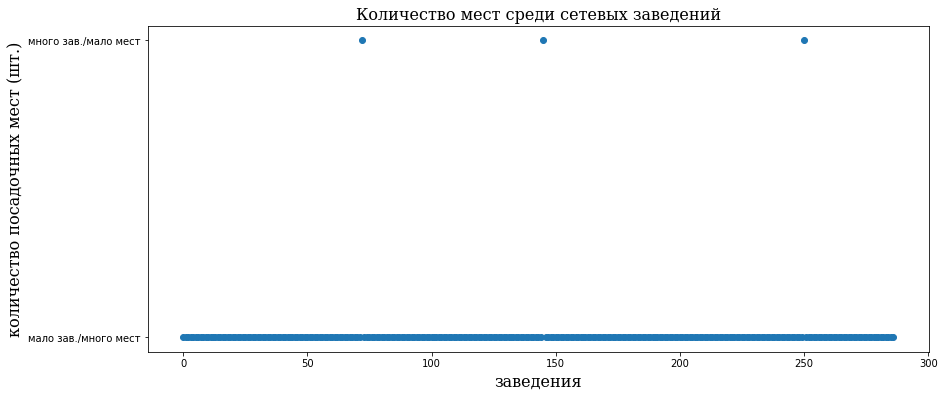

In [45]:
plt.scatter(x_values, y_values)

plt.title('Количество мест среди сетевых заведений', fontdict=font)
plt.xlabel('заведения', fontdict=font)
plt.ylabel('количество посадочных мест (шт.)', fontdict=font)
plt.show()

### Для сетевых заведений характерно, мало заведений и много мест.

## Какой вид предоставляет в среднем самое большое количество посадочных мест?

In [46]:
np.percentile(df['number'], [1, 5, 95, 99])

array([  0. ,   0. , 215.4, 300. ])

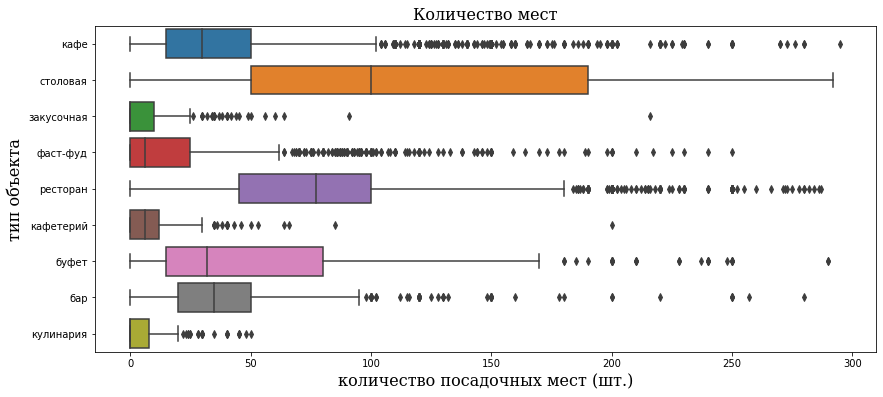

In [47]:
ax = sns.boxplot(x='number', y='object_type', data=df.query('number < 300'))

plt.title('Количество мест', fontdict=font)
plt.xlabel('количество посадочных мест (шт.)', fontdict=font)
plt.ylabel('тип объекта', fontdict=font)
plt.show()

In [48]:
object_type_numbers_mean = df.groupby('object_type')['number'].agg(
    ['count', 'mean', 'median']).sort_values('mean', ascending=False)

In [49]:
object_type_numbers_mean

,count,mean,median
object_type,,,
столовая,2584,130.34,103
ресторан,2281,96.93,80
буфет,575,51.51,32
бар,854,43.58,35
кафе,6068,39.79,30
фаст-фуд,1897,20.81,6
кафетерий,395,9.18,6
закусочная,346,7.67,0
кулинария,273,5.59,0


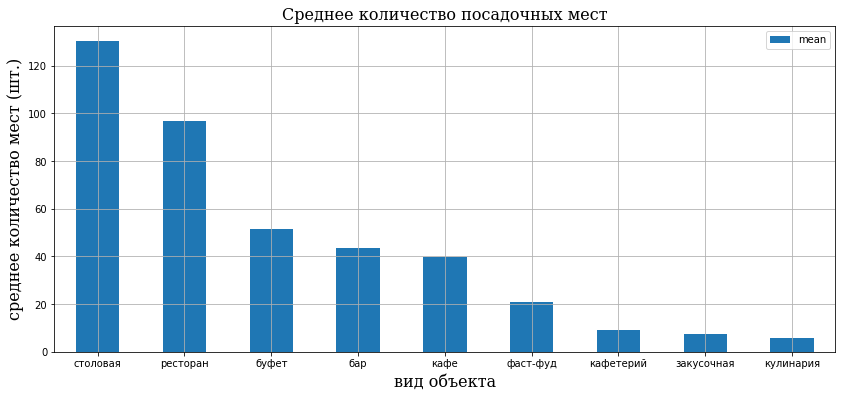

In [50]:
object_type_numbers_mean['mean'].plot.bar()

plt.title('Cреднее количество посадочных мест', fontdict=font)
plt.legend()
plt.xticks(rotation=0)
plt.xlabel('вид объекта', fontdict=font)
plt.ylabel('среднее количество мест (шт.)', fontdict=font)
plt.ylim(0)
plt.grid(True)
plt.show()

### Столовая имеет самое большое количество мест среди заведений.

## Выделите в отдельный столбец информацию об улице из столбца address

In [51]:
# забираем часть строки с названием улицы
address = df['address'].to_list()
streets = []

for street in address:
    start = street.find(', ')
    end = street.find('дом ')
    streets.append(street[start+1:end-2])

In [52]:
df['street'] = streets

In [53]:
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


## График топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?

In [54]:
top_10_street = df.groupby(['street'])['id'].agg(
    ['count']).sort_values('count', ascending=False).head(10)

In [55]:
top_10_street

,count
street,
проспект мира,203
профсоюзная улица,181
ленинградский проспект,169
пресненская набережная,167
варшавское шоссе,155
ленинский проспект,147
проспект вернадского,127
кутузовский проспект,114
каширское шоссе,103


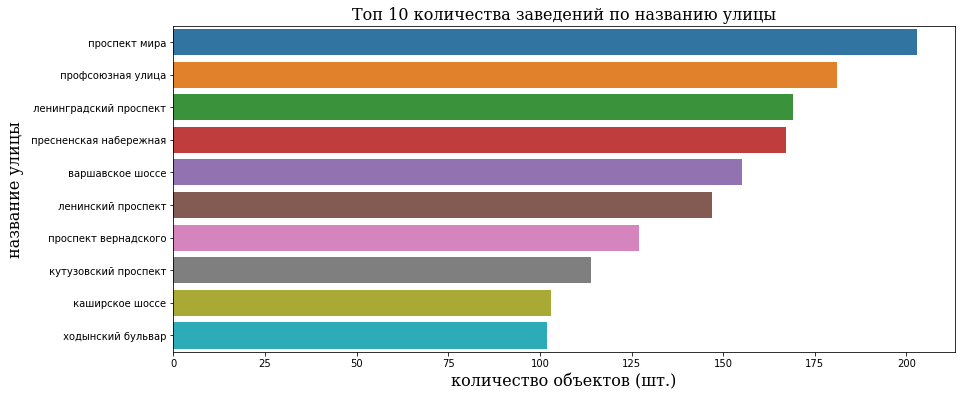

In [56]:
ax = sns.barplot(x='count', y=top_10_street.index, data=top_10_street)
ax.set_title('Топ 10 количества заведений по названию улицы', fontdict=font)
ax.set_xlabel('количество объектов (шт.)', fontdict=font)
ax.set_ylabel('название улицы', fontdict=font)
plt.show()

## Загрузка внешних данных по районам

ссылка где скачать доп файл, но он грузит через раз pd.read_csv()

https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y

ссылка с гугл  

https://drive.google.com/file/d/1tcWhobTTHXSc7i-AUev9eJD3XMPbEuoi/view?usp=sharing

In [57]:
!gdown 1tcWhobTTHXSc7i-AUev9eJD3XMPbEuoi

/bin/bash: gdown: command not found


In [58]:
# я не знаю что делать, то грузит то бесконечная загрузка идет через noosphere...
try:
    street = pd.read_csv('/content/mosgaz_streets.csv')
except:
    street = pd.read_csv(
        'https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y')

In [59]:
street.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [60]:
street = street[['streetname', 'area']]

In [61]:
street.columns = ['street', 'area']

In [62]:
street['street'] = street['street'].str.lower().str.strip()

In [63]:
top_10_street = top_10_street.reset_index()

In [64]:
top_10_street['street'] = top_10_street['street'].str.lower().str.strip()

In [65]:
top_10_street.merge(street, how='left', on='street').groupby(
    ['street', 'area'])['street'].agg(['count'])

count
street                 area                                  
варшавское шоссе       Донской район                        1
                       Нагорный район                       1
                       Район Нагатино-Садовники             1
                       Район Северное Бутово                1
                       Район Чертаново Северное             1
                       Район Чертаново Центральное          1
                       Район Чертаново Южное                1
                       Район Южное Бутово                   1
каширское шоссе        Район Москворечье-Сабурово           1
                       Район Нагатино-Садовники             1
                       Район Орехово-Борисово Северное      1
                       Район Орехово-Борисово Южное         1
кутузовский проспект   Район Дорогомилово                   1
                       Район Фили-Давыдково                 1
ленинградский проспект Район Аэропорт                       1
                       Район Беговой                        1
                       Район Сокол                          1
                       Хорошевский район                    1
ленинский проспект     Донской район                        1
                       Ломоносовский район                  1
                       Обручевский район                    1
                       Район Гагаринский                    1
                       Район Проспект Вернадского           1
                       Район Теплый Стан                    1
                       Район Тропарево-Никулино             1
                       Район Якиманка                       1
пресненская набережная Пресненский район                    1
проспект вернадского   Ломоносовский район                  1
                       Район Гагаринский                    1
                       Район Проспект Вернадского           1
                       Район Раменки                        1
                       Район Тропарево-Никулино             1
проспект мира          Алексеевский район                   1
                       Мещанский район                      1
                       Останкинский район                   1
                       Район Марьина роща                   1
                       Район Ростокино                      1
                       Район Свиблово                       1
                       Ярославский Район                    1
профсоюзная улица      Академический район                  1
                       Обручевский район                    1
                       Район Коньково                       1
                       Район Теплый Стан                    1
                       Район Черемушки                      1
                       Район Ясенево                        1
ходынский бульвар      Хорошевский район                    1

## Число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?

In [66]:
one_object_type_count = df.groupby('street')['id'].agg(
    ['count']).reset_index().query('count == 1')

In [67]:
one_object_type_count['street'] = one_object_type_count['street'].str.strip()

In [68]:
one_object_type_count = (one_object_type_count
                         .merge(street, how='left', on='street')
                         .dropna()
                         .drop_duplicates(subset='street', keep='last')
                         .reset_index(drop=True)
                         )

In [69]:
one_object_type_count['area'].unique()

array(['Район Аэропорт', 'Красносельский район', 'Район Свиблово',
       'Рязанский район', 'Район Якиманка', 'Район Хамовники',
       'Район Соколиная Гора', 'Даниловский район', 'Мещанский район',
       'Таганский район', 'Район Лефортово', 'Район Печатники',
       'Район Сокольники', 'Район Замоскворечье', 'Хорошевский район',
       'Район Арбат', 'Район Марьина роща', 'Алексеевский район',
       'Район Текстильщики', 'Район Ростокино', 'Район Раменки',
       'Район Хорошево-Мневники', 'Район Покровское-Стрешнево',
       'Район Богородское', 'Нижегородский район', 'Тверской район',
       'Лосиноостровский район', 'Район Преображенское',
       'Район Ново-Переделкино', 'Район Восточное Измайлово',
       'Район Беговой', 'Донской район', 'Район Гольяново',
       'Войковский Район', 'Савеловский район', 'Район Измайлово',
       'Район Перово', 'Район Филевский Парк', 'Район Чертаново Южное',
       'Южнопортовый Район', 'Головинский район', 'Район Южное Бутово',
       'Ос

In [70]:
one_object_type_count.groupby('area')['area'].agg(
    ['count']).sort_values('count', ascending=False).head()

,count
area,
Район Хамовники,26
Таганский район,25
Басманный район,24
Тверской район,19
Мещанский район,16


## Общий вывод и рекомендации.

В Москве подавляющее большинство заведений имеет тип "кафе", а именно 40% - что совпадает с нашим типом. "Кафе" имеют большую популярнсть среди москвичей, и тот факт что присуствует сильная конкуренция нас не пугает, так как наше предложения с облсуживанием роботами не имеет аналогов в Москве. Мы будем заметно выделяться среди всех "кафе", это приведет нас к быстрой популярности.

Только 20% заведений в Москве сетевые, причем самый популярный тип - "фаст-фуд". Для сетевых заведений характерно, мало заведений и много мест. Это свидетльствует о том что у нас есть перспективы развить наше кафе с роботами, в сеть франшиз. 

У нас есть топ 10 улиц, где много заведений питания, почти все улицы в центре, где очень высокая аренда. Именно на одной из улиц центра Москвы, стоит открываться. Наше кафе высоко-технологичное и стоит дорого, к тому же первое кафе подобного типа должно быть флагманским, а значит самым лучшим. Затраты на аренду окупятся сполна, большим количеством посетителей которые шли к конкурентам рядом, а придут к нам.

## Ссылка на презентацию.

https://drive.google.com/file/d/14ukQ1fjfDOYlKepFg-4UGGXzNXnh5ueh/view?usp=sharing